In [ ]:
import numpy as np
import cv2
from detectfaces import get_faces
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras import backend as K
import matplotlib.pyplot as plt
import time

img_rows, img_cols = 48, 48
#emotion = ['Bored', "Bored", 'Confusion', 'Satisfaction', 'Confusion', 'Confusion', 'Satisfaction']
emotion = ['Angry', "Disgust", 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
font = cv2.FONT_HERSHEY_SIMPLEX

model = []
print('Loading Models...')
print('0/3')
for i in range(2):
    m = load_model('C:/Users/TOTAN/Downloads/EmotionRecognition-master/EmotionRecognition-master/saved_model_main/' + 'cnn'+str(i)+'.h5')
    print(str(i+1) + '/3')
    model.append(m)

m = load_model('C:/Users/TOTAN/Downloads/EmotionRecognition-master/EmotionRecognition-master/saved_model_main/ensemble.h5')
model.append(m)
print('3/3')

print("Loading Complete!")

def predict(x):
    x_rev = np.flip(x, 1)
    x = x.astype('float32')
    x_rev = x_rev.astype('float32')
    x /= 255
    x_rev /= 255
    p = np.zeros((1, 14))
    p[:,0:7] = model[0].predict(x.reshape(1,48,48,1))
    p[:,0:7] = model[1].predict(x_rev.reshape(1,48,48,1))
    pre = model[2].predict(p)
    return pre
test_list = []
c = 0
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap.open()

while(True):
    ret, img = cap.read()

    faces = get_faces(img, method='dnn')
    for i, (y,x,face) in enumerate(faces):
        pre = predict(face)
        k = np.argmax(pre)
        time.sleep(0.5)
        c = c + 1
        txt = emotion[k] #+ ' [' + str(int(pre[0,k]*100)) + '%]'
        print(txt)
        print(c)
        test_list.append(txt)
        #print ("Original list : " + str(test_list))
        max = 0
        res = test_list[0]
        for i in test_list:
            freq = test_list.count(i)
            if freq > max:
                max = freq
                res = i

        # printing result
        # print ("Most frequent number is : " + str(res))
        if(c == 20):
            cv2.putText(img, res, (x, y), font, 0.5,(0,255,0),1,cv2.LINE_AA)
            print ("Most frequent number is : " + str(res))
            c = 0
            test_list.clear()
        # cv2.imshow(str(i), face)

    cv2.imshow('Camera', img)
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Loading Models...
0/3
1/3
2/3
3/3
Loading Complete!
Sad
1
Neutral
2
Angry
3
Fear
4
Angry
5
Neutral
6
Angry
7
Angry
8
Angry
9
Angry
10
Fear
11
Happy
12
Angry
13
Angry
14
Angry
15
Angry
16
Angry
17
Angry
18
Neutral
19
Angry
20
Most frequent number is : Angry
Neutral
1
Neutral
2
Neutral
3
Angry
4
Neutral
5
Neutral
6
Neutral
7
Neutral
8
Fear
9
Neutral
10
Fear
11
Neutral
12
Neutral
13
Neutral
14
Neutral
15
Neutral
16
Neutral
17
Neutral
18
Neutral
19
Neutral
20
Most frequent number is : Neutral
Neutral
1
Neutral
2
Neutral
3
Neutral
4
Neutral
5
Neutral
6
Neutral
7
Neutral
8
Neutral
9
Neutral
10
Neutral
11
Happy
12
Neutral
13
Happy
14
Neutral
15
Happy
16
Neutral
17
Fear
18
Neutral
19
Neutral
20
Most frequent number is : Neutral
Neutral
1
Neutral
2
Neutral
3
Neutral
4
Neutral
5
Neutral
6
Neutral
7
Neutral
8
Neutral
9
Neutral
10
Neutral
11
Neutral
12
Neutral
13
Neutral
14
Neutral
15
Neutral
16
Neutral
17
Neutral
18
Fear
19
Neutral
20
Most frequent number is : Neutral
Neutral
1
Neutral
2
Neutral


In [ ]:
import numpy as np
import cv2
from detectfaces import get_faces
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras import backend as K
import matplotlib.pyplot as plt

img_rows, img_cols = 48, 48
# 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral
emotion = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
font = cv2.FONT_HERSHEY_SIMPLEX

model = []
print('Loading Models...')
print('0/3')
for i in range(2):
    m = load_model('C:/Users/TOTAN/Downloads/EmotionRecognition-master/EmotionRecognition-master/saved_model_main/' + 'cnn'+str(i)+'.h5')
    print(str(i+1) + '/3')
    model.append(m)

m = load_model('C:/Users/TOTAN/Downloads/EmotionRecognition-master/EmotionRecognition-master/saved_model_main/ensemble.h5')
model.append(m)
print('3/3')

print("Loading Complete!")

def predict(x):
    x_rev = np.flip(x, 1)
    x = x.astype('float32')
    x_rev = x_rev.astype('float32')
    x /= 255
    x_rev /= 255
    p = np.zeros((1, 14))
    p[:,0:7] = model[0].predict(x.reshape(1,48,48,1))
    p[:,7:14] = model[1].predict(x_rev.reshape(1,48,48,1))
    pre = model[2].predict(p)
    return pre

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    cap.open()

while(True):
    ret, img = cap.read()

    faces = get_faces(img, method='dnn')
    for i, (y,x,face) in enumerate(faces):
        pre = predict(face)
        k = np.argmax(pre)
        txt = emotion[k] + ' [' + str(int(pre[0,k]*100)) + '%]'
        cv2.putText(img, txt, (x, y), font, 0.5,(0,255,0),1,cv2.LINE_AA)
        # cv2.imshow(str(i), face)

    cv2.imshow('Camera', img)
    if cv2.waitKey(20) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Loading Models...
0/3
1/3
2/3
3/3
Loading Complete!


Loading Models...
0/3
1/3
2/3
3/3
Loading Complete!
[[536   0   8   3  20   3  19]
 [  2  47   0   1   3   0   0]
 [ 13   0 437  15  37   9  24]
 [  8   0   2 947   3   3  20]
 [ 20   0  13   6 608   1  28]
 [  3   0   9   7   7 450   8]
 [ 11   0   5  14  36   3 611]]


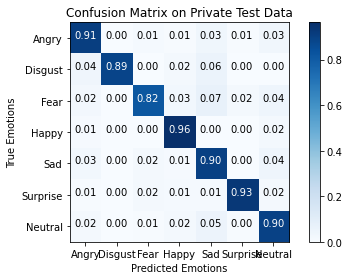

In [12]:
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.models import load_model
import matplotlib.pyplot as plt
from keras import backend as K
import pandas as pd
import numpy as np
import itertools
import keras
import cv2

emotion = ['Angry', "Disgust", 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
img_rows, img_cols = 48, 48
num_classes = 7

data = pd.read_csv('fer(2013).csv', delimiter=',')
data_test = data[26000:30000]
y_test = data_test['emotion'].values

x_test = np.zeros((y_test.shape[0], 48*48))
for i in range(y_test.shape[0]):
    x_test[i] = np.fromstring(data_test['pixels'][26000+i], dtype=int, sep=' ')

x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_test_rev = np.flip(x_test, 2)

input_shape = (img_rows, img_cols, 1)
x_test = x_test.astype('float32')
x_test_rev = x_test_rev.astype('float32')
x_test /= 255
x_test_rev /= 255
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes = 7)

print('Loading Models...')
print('0/3')
model = []
for i in range(2):
    m = load_model('C:/Users/TOTAN/Downloads/EmotionRecognition-master/EmotionRecognition-master/saved_model_main/' + 'cnn'+str(i)+'.h5')
    print(str(i+1) + '/3')
    model.append(m)

m = load_model('C:/Users/TOTAN/Downloads/EmotionRecognition-master/EmotionRecognition-master/saved_model_main/ensemble.h5')
model.append(m)
print('3/3')
print("Loading Complete!")

def plot_confusion_matrix(cm):
    print(cm)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix on Private Test Data')
    plt.colorbar()
    tick_marks = np.arange(len(emotion))
    plt.xticks(tick_marks, emotion)
    plt.yticks(tick_marks, emotion)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Emotions')
    plt.xlabel('Predicted Emotions')
    plt.tight_layout()

p = np.zeros((y_test.shape[0],14))
p[:,0:7] = model[0].predict(x_test)
p[:,7:14] = model[1].predict(x_test_rev)
y_pred = model[2].predict(p)
yp = np.argmax(y_pred, axis=1)
yt = np.argmax(y_test, axis=1)
cm = confusion_matrix(yt, yp)
plot_confusion_matrix(cm)
plt.savefig("cm.png")
plt.show()


In [ ]:
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.models import load_model
import matplotlib.pyplot as plt
from keras import backend as K
import pandas as pd
import numpy as np
import itertools
import keras
import cv2

emotion = ['Angry', "Disgust", 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
img_rows, img_cols = 48, 48
num_classes = 7

data = pd.read_csv('fer(2013).csv', delimiter=',')
data_test = data[32298:]
y_test = data_test['emotion'].values

x_test = np.zeros((y_test.shape[0], 48*48))
for i in range(y_test.shape[0]):
    x_test[i] = np.fromstring(data_test['pixels'][32298+i], dtype=int, sep=' ')

x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_test_rev = np.flip(x_test, 2)

input_shape = (img_rows, img_cols, 1)
x_test = x_test.astype('float32')
x_test_rev = x_test_rev.astype('float32')
x_test /= 255
x_test_rev /= 255
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes = 7)

print('Loading Models...')
print('0/3')
model = []
for i in range(2):
    m = load_model('C:/Users/TOTAN/Downloads/EmotionRecognition-master/EmotionRecognition-master/saved_model_main/' + 'cnn'+str(i)+'.h5')
    print(str(i+1) + '/3')
    model.append(m)

m = load_model('C:/Users/TOTAN/Downloads/EmotionRecognition-master/EmotionRecognition-master/saved_model_main/ensemble.h5')
model.append(m)
print('3/3')
print("Loading Complete!")

def plot_confusion_matrix(cm):
    print(cm)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix on Private Test Data')
    plt.colorbar()
    tick_marks = np.arange(len(emotion))
    plt.xticks(tick_marks, emotion)
    plt.yticks(tick_marks, emotion)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Emotions')
    plt.xlabel('Predicted Emotions')
    plt.tight_layout()

p = np.zeros((y_test.shape[0],14))
p[:,0:7] = model[0].predict(x_test)
p[:,7:14] = model[1].predict(x_test_rev)
y_pred = model[2].predict(p)
yp = np.argmax(y_pred, axis=1)
yt = np.argmax(y_test, axis=1)
cm = confusion_matrix(yt, yp)
plot_confusion_matrix(cm)
plt.savefig("cm.png")
plt.show()


In [4]:
# Python3 code to demonstrate
# to get most frequent element
# using naive method

# initializing list
#test_list = [9, 4, 5, 4, 4, 5, 9, 5, 4]
test_list = ['Angry', "Disgust", 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral','Angry', "Disgust", 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral','Happy', "Disgust", 'Fear', 'Happy', 'Happy', 'Surprise', 'Neutral']
test_list.append("orange")
# printing original list
#print ("Original list : " + str(test_list))

# using naive method to
# get most frequent element
max = 0
res = test_list[0]
for i in test_list:
	freq = test_list.count(i)
	if freq > max:
		max = freq
		res = i
	
# printing result
print ("Most frequent number is : " + str(res))


Most frequent number is : Happy
